In [89]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.patches import Arc, Rectangle, ConnectionPatch, Patch
from pandas.io.json import json_normalize
%matplotlib inline 

In [90]:
with open('C:/Users/shubham/Desktop/Football Analysis/Project - 6/69199.json') as data_file:
    data = json.load(data_file)
df = json_normalize(data, sep = '_')

C:\Users\shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


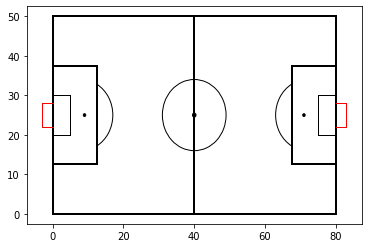

In [91]:
fig = plt.figure()
ax = fig.add_subplot()

#Outer lines
plt.plot([0,0],[0,50],color='black',linewidth=2)
plt.plot([0,80],[50,50],color='black',linewidth=2)
plt.plot([80,80],[50,0],color='black',linewidth=2)
plt.plot([80,0],[0,0],color='black',linewidth=2)
plt.plot([40,40],[0,50],color='black',linewidth=2)

#Left Penalty Area
plt.plot([0,12.5],[12.5,12.5],color='black',linewidth=2)
plt.plot([0,12.5],[37.5,37.5],color='black',linewidth=2)
plt.plot([12.5,12.5],[12.5,37.5],color='black',linewidth=2)

#Six Yard box
plt.plot([0,5],[20,20],color='black',linewidth=1)
plt.plot([0,5],[30,30],color='black',linewidth=1)
plt.plot([5,5],[20,30],color='black',linewidth=1)

#Right Penalty Area
plt.plot([80,67.5],[12.5,12.5],color='black',linewidth=2)
plt.plot([80,67.5],[37.5,37.5],color='black',linewidth=2)
plt.plot([67.5,67.5],[37.5,12.5],color='black',linewidth=2)

#Six Yard box
plt.plot([80,75],[20,20],color='black',linewidth=1)
plt.plot([80,75],[30,30],color='black',linewidth=1)
plt.plot([75,75],[20,30],color='black',linewidth=1)


#Circles
CentreCircle = Arc((40,25),width=18,height=18,angle=0,theta1=0,theta2=360,color='black')
#CentreSpot = Arc((40,25),width=0.8,height=0.8,angle=0,theta1=0,theta2=360,color='black')
#leftPenSpot = Arc((9,25),width=0.8,height=0.8,angle=0,theta1=0,theta2=360,color='black')
#rightPenSpot = Arc((71,25),width=0.8,height=0.8,angle=0,theta1=0,theta2=360,color='black')
CentreSpot = plt.Circle((40,25),radius=0.5,color='black',fill=True)
leftPenSpot = plt.Circle((9,25),radius=0.35,color='black',fill=True)
rightPenSpot = plt.Circle((71,25),radius=0.35,color='black',fill=True)

#Arcs
leftArc = Arc((8,25),width=18,height=18,angle=0,theta1=300,theta2=60,color='black',linewidth=1)
rightArc = Arc((72,25),width=18,height=18,angle=0,theta1=120,theta2=240,color='black',linewidth=1)

#Goals
plt.plot([-3,0],[22,22],color='red',linewidth=1)
plt.plot([-3,0],[28,28],color='red',linewidth=1)
plt.plot([-3,-3],[22,28],color='red',linewidth=1)

plt.plot([83,80],[22,22],color='red',linewidth=1)
plt.plot([83,80],[28,28],color='red',linewidth=1)
plt.plot([83,83],[22,28],color='red',linewidth=1)


ax.add_patch(CentreCircle)
ax.add_patch(CentreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)
ax.add_patch(leftArc)
ax.add_patch(rightArc)


In [92]:
def draw_pitch(ax, colour = None, edge = 'black'):
    
    Background = Rectangle([-10,-10], width = 135, height = 95, fill = False)
    # Pitch Outline and Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, fill = False)
    
    if colour:
        Background = Rectangle([-10,-10], width = 135, height = 95, color = colour)
        # Pitch Outline and Centre Line
        Pitch = Rectangle([0,0], width = 120, height = 80, edgecolor = edge, facecolor = colour)
    
    # Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,18], width = 18, height = 44, edgecolor = edge, fill = False)
    RightPenalty = Rectangle([102,18], width = 18, height = 44, edgecolor = edge, fill = False)
    midline = ConnectionPatch([60,0], [60,80], 'data', 'data', color = edge)
    
    # Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,30], width = 6, height = 20, edgecolor = edge, fill = False)
    RightSixYard = Rectangle([114,30], width = 6, height = 20, edgecolor = edge, fill = False)
    
    #Goals
    LeftGoal = Rectangle([-3,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    RightGoal = Rectangle([120,36], width = 3, height = 8, linewidth = 1, edgecolor = 'black', fill = False)
    
    # Prepare Circles
    centreCircle = plt.Circle((60,40), 8.1, color = edge, fill = False)
    centreSpot = plt.Circle((60,40), 0.71, color = edge)
    
    # Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((12,40), 0.71, color = edge)
    rightPenSpot = plt.Circle((108,40), 0.71, color = edge)
    leftArc = Arc((14, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 300, theta2 = 60, color = edge)
    rightArc = Arc((106, 40), height = 16.2, width = 16.2, angle = 0, theta1 = 120, theta2 = 240, color = edge)
    
    element = [Background, Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc, LeftGoal, RightGoal]
    for i in element:
        ax.add_patch(i)

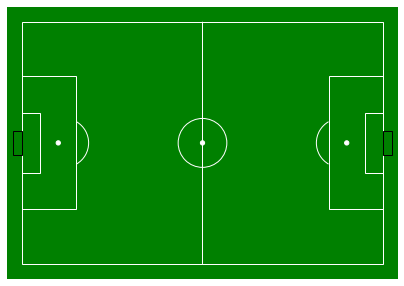

In [93]:
fig = plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1, 1, 1)
draw_pitch(ax, 'green', 'white')
plt.ylim(-5, 85)
plt.xlim(-5, 125)
plt.axis('off')
plt.show()

In [95]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,shot_redirect,injury_stoppage_in_chain,foul_committed_penalty,foul_won_penalty,foul_committed_card_id,foul_committed_card_name,clearance_other,foul_committed_type_id,foul_committed_type_name,foul_committed_offensive
0,48b9296c-a9e6-401a-8d45-6dd120d9744f,1,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91e3c9d1-ffa9-4370-bf82-caf5bd4fe9cc,2,1,00:00:00.000,0,0,1,0.00000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,94dab451-b8da-43af-aa5e-01a02c0125c7,3,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,913a53fb-3b54-4dd2-a713-1d1c9add6c32,4,1,00:00:00.000,0,0,1,0.00000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33c56e6f-10eb-4546-b868-21d62bf5f730,5,1,00:00:00.810,0,0,2,1.81623,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
#data

In [101]:
def heat_pass_shot_map(ax, data, player_name, passes = False, shots = False, heatmap = False):
    shot_data = data[(data['type_name'] == 'Shot') & (data['player_name'] == player_name)]
    pass_data = data[(data['type_name'] == 'Pass') & (data['player_name'] == player_name)]
    action_data = data[(data['player_name'] == player_name)][:-1]
    
    ax.title.set_text(player_name)

    if heatmap:
        draw_pitch(ax)
    else:
        draw_pitch(ax, 'green', 'white')
    
    if passes:
        for i in range(len(pass_data)):
            # Differentiate different half by different colour
            color = 'blue' if pass_data.iloc[i]['period'] == 1 else 'red'
            ax.annotate('', xy = (pass_data.iloc[i]['pass_end_location'][0], pass_data.iloc[i]['pass_end_location'][1]), xycoords = 'data',
                xytext = (pass_data.iloc[i]['location'][0], pass_data.iloc[i]['location'][1]), textcoords = 'data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color=color))
    
    if shots:
        for i in range(len(shot_data)):
            # Differentiate different half by different colour
            color = 'black' 
            if shot_data.iloc[i]['shot_outcome_name'] == 'Goal':
                color ='yellow'
            elif shot_data.iloc[i]['shot_outcome_name'] == 'Saved':
                color = 'purple'
            ax.annotate('', xy = (shot_data.iloc[i]['shot_end_location'][0], shot_data.iloc[i]['shot_end_location'][1]), xycoords = 'data',
                xytext = (shot_data.iloc[i]['location'][0], shot_data.iloc[i]['location'][1]), textcoords = 'data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color=color))
    
    if heatmap:
        x_coord = [i[0] for i in action_data['location']]
        y_coord = [i[1] for i in action_data['location']]
        sns.kdeplot(x_coord, y_coord, shade = 'True', color = 'green', n_levels = 30, ax=ax)

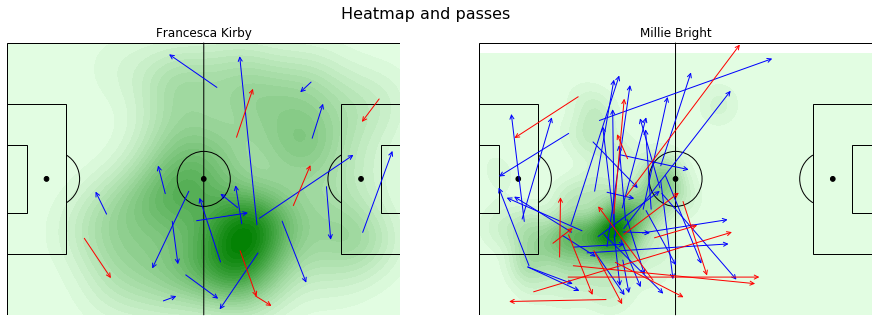

In [102]:
fig = plt.figure(edgecolor='green')
fig.set_size_inches(15.5, 5)
fig.suptitle('Heatmap and passes', fontsize=16)

ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)


heat_pass_shot_map(ax1, df, 'Francesca Kirby', passes = True, heatmap = True)
heat_pass_shot_map(ax2, df, 'Millie Bright', passes = True, heatmap = True)


ax1.set(ylim=(0, 80))
ax1.set(xlim=(0, 120))
ax1.axis('off')
ax2.set(ylim=(0, 80))
ax2.set(xlim=(0, 120))
ax2.axis('off')
plt.show()

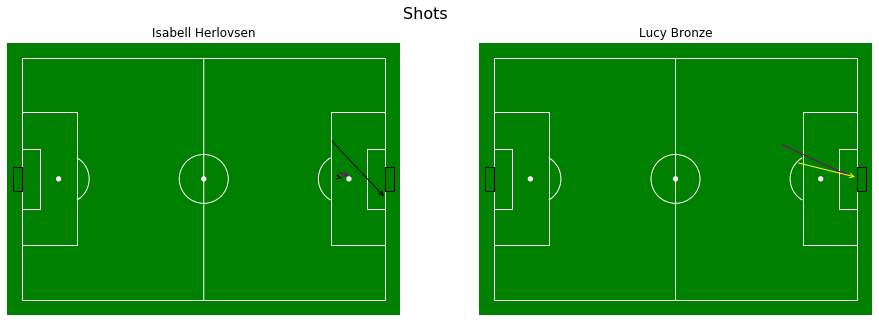

In [103]:
fig = plt.figure(edgecolor='green')
fig.set_size_inches(15.5, 5)
fig.suptitle('Shots', fontsize=16)

ax1=fig.add_subplot(1, 2, 1)
ax2=fig.add_subplot(1, 2, 2)


heat_pass_shot_map(ax1, df, 'Isabell Herlovsen', passes = False, shots = True)
heat_pass_shot_map(ax2, df, 'Lucy Bronze', passes = False, shots = True)


ax1.set(ylim=(-5, 85))
ax1.set(xlim=(-5, 125))
ax1.axis('off')
ax2.set(ylim=(-5, 85))
ax2.set(xlim=(-5, 125))
ax2.axis('off')
plt.show()